# 0.0 Imports

In [1]:
import math
import numpy as np
import seaborn as sns
import inflection
import pandas as pd

from IPython.core.display import HTML 
from IPython.display import Image 
from PIL import Image

# 0.1 Help Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 0.2 Loading Data

In [4]:


df_sales = pd.read_csv('/home/guilherme/Documentos/repos/datascienceemproducao/data/train.csv',low_memory=False)

df_store = pd.read_csv('/home/guilherme/Documentos/repos/datascienceemproducao/data/store.csv',low_memory=False)

#merge
df_raw = pd.merge(df_sales,df_store,how= 'left', on='Store')

# 1.0 Descrition Data

In [5]:
df1 = df_raw.copy(deep=True)

# 1.1  Rename Columns

In [6]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [7]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
           'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
           'CompetitionDistance', 'CompetitionOpenSinceMonth',
           'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
           'Promo2SinceYear', 'PromoInterval']

#function to convent columns format snackcase
snackcase= lambda x: inflection.underscore( x )


cols_new= list( map( snackcase, cols_old ))

#rename columns 

df1.columns = cols_new



# 1.2 Data Dimensions

In [8]:
print('The number of    Rows: {}'.format(df1.shape[0]))
print('The number of Columns: {}'.format(df1.shape[1]))

The number of    Rows: 1017209
The number of Columns: 18


# 1.3 Data Types

In [9]:
# convent the colum data to datetime64
df1['date'] = df1['date'].astype('datetime64[ns]')

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

# 1.4 Check NA

In [10]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

# 1.4.1 Check NA %

In [11]:
df1.isna().sum() / df1.shape[0] * 100

store                            0.000000
day_of_week                      0.000000
date                             0.000000
sales                            0.000000
customers                        0.000000
open                             0.000000
promo                            0.000000
state_holiday                    0.000000
school_holiday                   0.000000
store_type                       0.000000
assortment                       0.000000
competition_distance             0.259730
competition_open_since_month    31.787764
competition_open_since_year     31.787764
promo2                           0.000000
promo2_since_week               49.943620
promo2_since_year               49.943620
promo_interval                  49.943620
dtype: float64

# 1.5 FillOut NA

In [12]:
#competition_distance
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x )



df1['competition_open_since_month']= df1.apply(lambda x: x['date'].month if 
                                               math.isnan(x['competition_open_since_month']) 
                                               else x['competition_open_since_month'], axis=1)



df1['competition_open_since_year']= df1.apply(lambda x: x['date'].year if
                                              math.isnan(x['competition_open_since_year']) 
                                              else x['competition_open_since_year'],axis=1)


df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week'])
                                     else x['promo2_since_week'],axis=1)

df1['promo2_since_year']= df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year'])
                                     else x['promo2_since_year'],axis=1)


#dict of year to month
month_map = {1: 'Jan',2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
             6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov' ,12: 'Dec' }


#substituindo NA por 0
df1['promo_interval'].fillna(0,inplace=True)

#extract month data 
df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval','month_map']].apply(lambda x:0 if x['promo_interval']==0 
                                                            else 1 if x['month_map'] in x['promo_interval'].split( ',' ) 
                                                            else 0,axis=1)


In [13]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

# 1.6 Change Types

In [14]:


df1['promo2_since_week']  = df1['promo2_since_week'] .astype(int)

df1['promo2_since_year']  = df1['promo2_since_year'] .astype(int)

df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)

df1['competition_open_since_year'] =  df1['competition_open_since_year'].astype(int)

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

# 1.7 Descrptive Statistics

In [15]:
num_attributes = df1.select_dtypes( include = ['int64','float64'] )

cat_attributes = df1.select_dtypes( exclude = ['int64','float64','datetime64[ns]'] )

# 1.7.1 Numeric Attributes

In [16]:
#tendecy Central

#mean and median 

t1 = pd.DataFrame(num_attributes.apply(lambda x: np.mean( x ) ) ).T
t2 = pd.DataFrame(num_attributes.apply(lambda x: np.median( x ) ) ).T

# min - max - std - range - skew - kurtose

#min 
d1 = pd.DataFrame(num_attributes.apply(lambda x: np.min(x) ) ).T

#max
d2 = pd.DataFrame(num_attributes.apply(lambda x: np.max(x) ) ).T

#range

d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() ) ).T

#std 

d4 = pd.DataFrame(num_attributes.apply(lambda x: np.std(x) ) ).T

#skew

d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() ) ).T

#kurtosis
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() ) ).T

#concat metrics
m1 = pd.concat([t1,t2,d1,d2,d3,d4,d5,d6]).T.reset_index()

#rename columns
m1.columns = ['attributes','mean','median','min','max','range','std','skew','kurtosis']
m1

,attributes,mean,median,min,max,range,std,skew,kurtosis
0,store,558.429727,558.0,1.0,1115.0,1114.0,321.908493,-0.000955,-1.200524
1,day_of_week,3.998341,4.0,1.0,7.0,6.0,1.997390,0.001593,-1.246873
2,sales,5773.818972,5744.0,0.0,41551.0,41551.0,3849.924283,0.641460,1.778375
3,customers,633.145946,609.0,0.0,7388.0,7388.0,464.411506,1.598650,7.091773
4,open,0.830107,1.0,0.0,1.0,1.0,0.375539,-1.758045,1.090723
5,promo,0.381515,0.0,0.0,1.0,1.0,0.485758,0.487838,-1.762018
6,school_holiday,0.178647,0.0,0.0,1.0,1.0,0.383056,1.677842,0.815154
7,competition_distance,5935.442677,2330.0,20.0,200000.0,199980.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,6.786849,7.0,1.0,12.0,11.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,2010.324840,2012.0,1900.0,2015.0,115.0,5.515591,-7.235657,124.071304


/home/guilherme/Documentos/repos/datascienceemproducao/datascienceemproducao/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


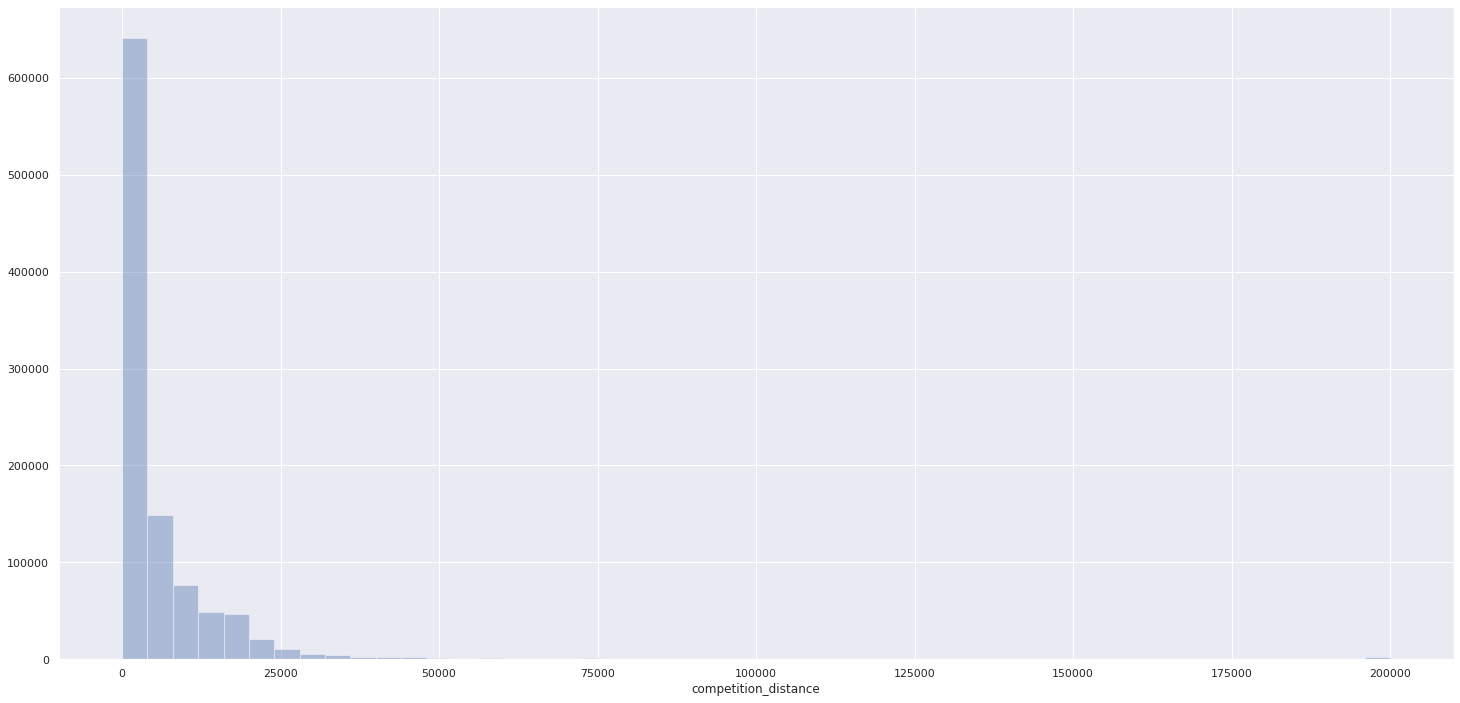

In [17]:
sns.distplot(df1['competition_distance'],kde=False);


# 1.7.2 Categorical Attributes

In [18]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

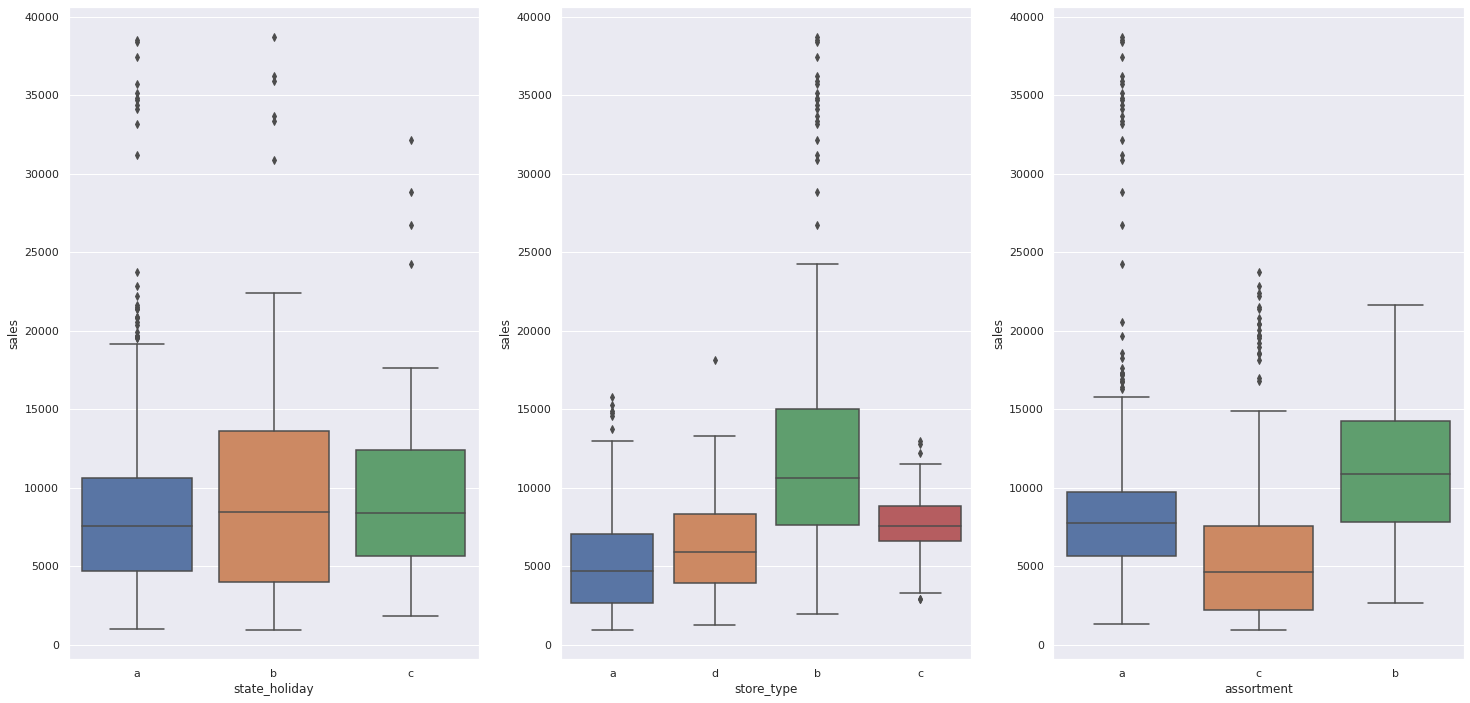

In [19]:
#filter the data
aux1 = df1[(df1['state_holiday']!= '0') & (df1['sales']> 0) ]

#state holiday
plt.subplot(1,3,1)
sns.boxplot(x= 'state_holiday', y='sales', data=aux1);

#store_type
plt.subplot(1,3,2)
sns.boxplot(x= 'store_type', y='sales', data=aux1);

#assortment
plt.subplot(1,3,3)
sns.boxplot(x= 'assortment', y='sales', data=aux1);


# 2.0 Feature Engineering


In [20]:
df2= df1.copy(deep=True)

# 2.1 Mind Map Hpyothesis

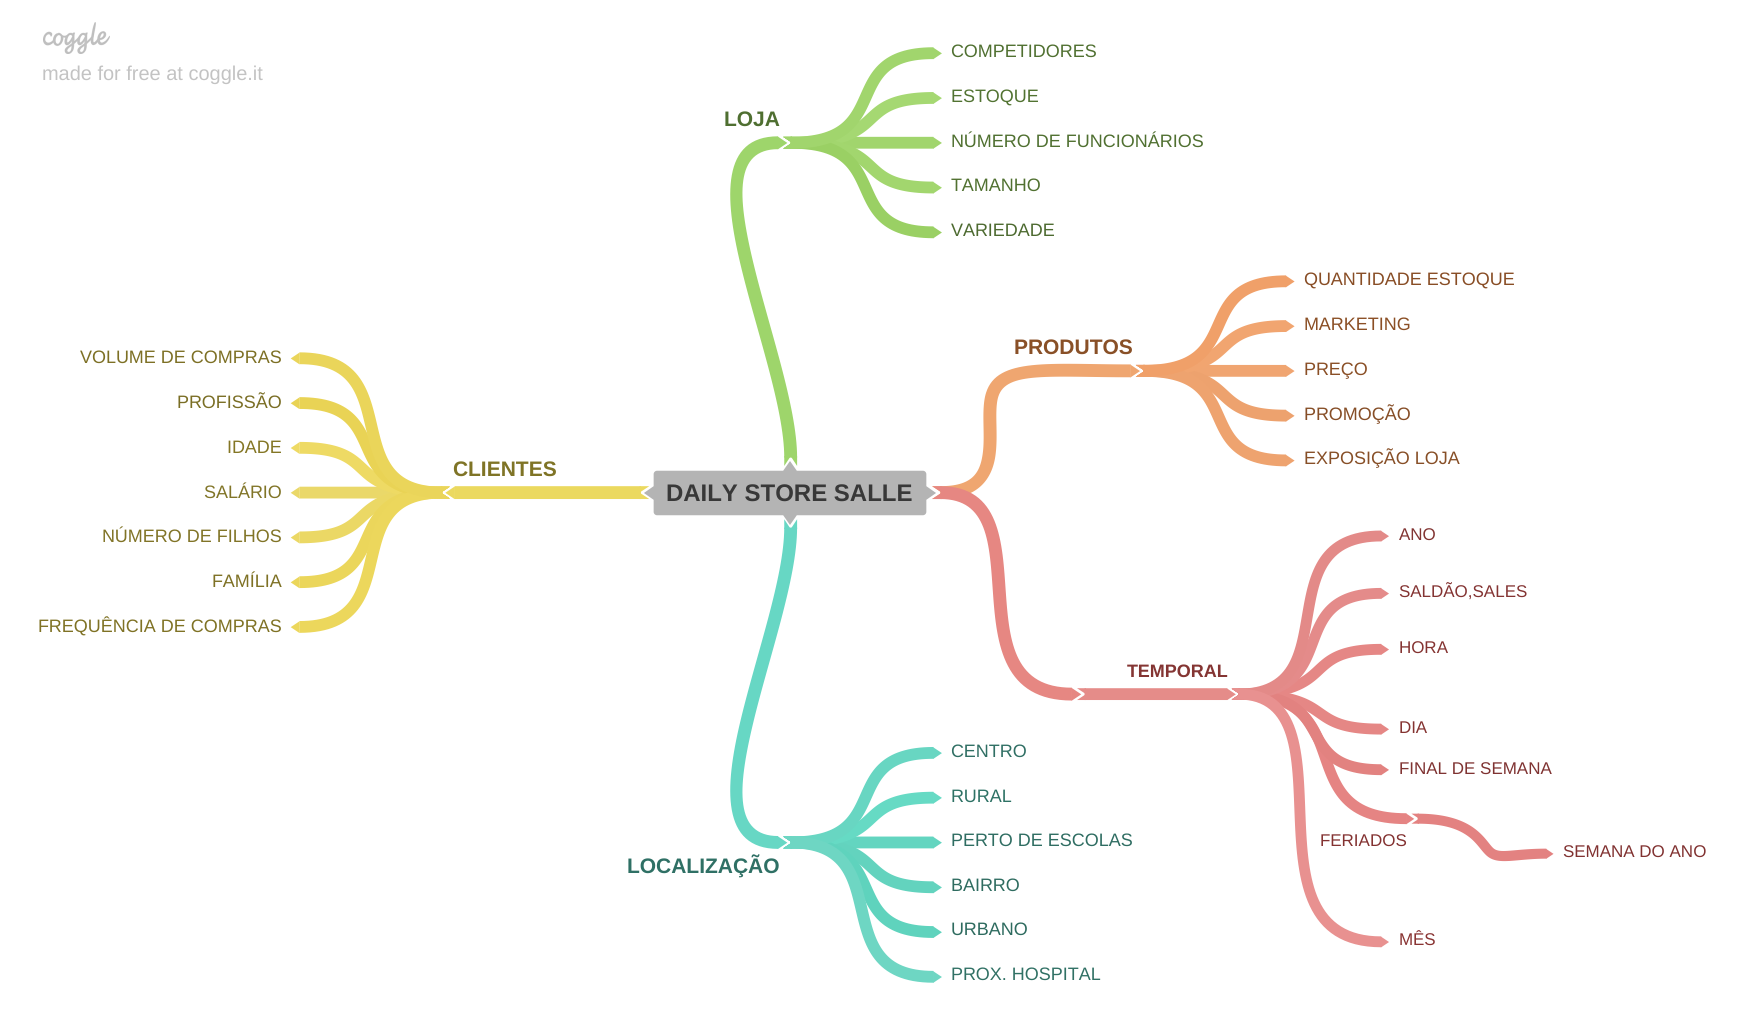

In [21]:
img = Image.open('/home/guilherme/Documentos/repos/datascienceemproducao/img/MindMapHpyothesis.png')
img

# 2.2 - List Hpyothesis

## 2.2.1 Store Hpyothesis 

**1** . Lojas com número maior de fúncionários deveriam vender mais.

**2**. Lojas com maior variedades de produtos deveriam vender mais.

**3**. Lojas com maior porte deveriam vender mais.

**4**. Lojas com maior capacidade de estoque deveriam vender mais.

**5**. Lojas com competidores mais próximo deveriam venderiam mais.

**6**. Lojas com competidores à mais tempo deveriam vender mais.

## 2.2.2 Product Hpyothesis

**1**. Lojas que fazem mais ação de marketing deveriam vender mais.

**2**. Lojas com mais exposição dos seus produtos deveriam vender mais.

**3**. Lojas que ativam promoções por mais tempo deveriam vender mais.

**4**. Lojas com promoções mais agressivas (descontos maiores) deveriam vender mais.

**5**. Lojas com mais promoções deveriam vender mais.

**6**. Lojas com mais promoções consecutivas deveriam vender mais.

**7**. Lojas que tem preços mais baixos deveriam vender mais.

**8**. Lojas com mais produtos em estoque deveriam vender mais.

## 2.2.3 Temporal Hpyothesis

**1**. Lojas abertas no feriaodo de Natal deveriam vender mais.

**2**. Lojas deveriam vender mais ao longo dos anos.

**3**. Lojas deveriam vender mais depois do dia 10 de cada mês.

**4**. Lojas deveriam vender menos aos finais de semana.

**5**. Lojas deveriam vender mais no segundo semestre do ano.

**6**. Lojas deveriam vender menos nos feriaods escolares.

# 2.3 List Final Hpyothesis

**1**. Lojas com maior sortimentos deveriam vender mais.

**2**. Lojas com competidores mais próximos deveriam vender menos.

**3**. Lojas com competidores à mais tempo deveriam vendem mais.

**4**. Lojas com promoções ativas por mais tempo deveriam vender mais.

**5**. Lojas com mais dias de promoção deveriam vender mais.

**7**. Lojas com mais promoções consecutivas deveriam vender mais.

**8**. Lojas abertas durante o feriado de Natal deveriam vender mais.

**9**. Lojas deveriam vender mais ao longo dos anos.

**10**. Lojas deveriam vender mais no segundo semestre do ano.

**11**. Lojas deveriam vender mais depois do dia 10 de cada mês.

**12**. Lojas deveriam vender menos aos finais de semana.

**13**. Lojas deveriam vender menos durante os feriados escolares.



# 2.4 Feature Engineering

In [22]:
df2['year']= df2['date'].dt.year

df2['month'] = df2['date'].dt.month

df2['day'] = df2['date'].dt.day

df2['week_of_year'] = df2['date'].dt.isocalendar().week

df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'],
                                                               month=x['competition_open_since_month'],
                                                               day=1),axis=1)

df2['compettion_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply(lambda x: x.days).astype(int)

#join the columns promo2
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)

# convent promo time week to datetime
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime( x + '-1','%Y-%W-%w') - datetime.timedelta(days=7) )


#calcule between start promo and continuation 
df2['promo_time_week'] = (( df2['date'] - df2['promo_since'] ) /7 ).apply(lambda x: x.days).astype(int)

# renome names assortment 
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x== 'a' else 'extra' if x =='b'else 'extended')

#rename state holiday

df2['state_holiday']= df2['state_holiday'].apply(lambda x: 'public_holiday' if x=='a' 
                                                 else 'easter_holiday' if x=='b' 
                                                 else 'christmas' if x=='c'
                                                 else 'regular_day')

# 3.0 Variable filtering

In [23]:
df3 = df2.copy(deep=True)

# 3.1 Filtering the data

In [24]:
#filtereing the rows open and sales of dataset

df3= df3.loc[(df3['open'] > 0) & (df3['sales'] > 0) ] 

# 3.2 Select the columns

In [25]:
cols_drop= ['customers','open','promo_interval','month_map']

df3 = df3.drop( cols_drop,axis=1 )

# 4 EDA

In [26]:
df4 = df3.copy(deep=True)

# 4 .1  Analise Univariada

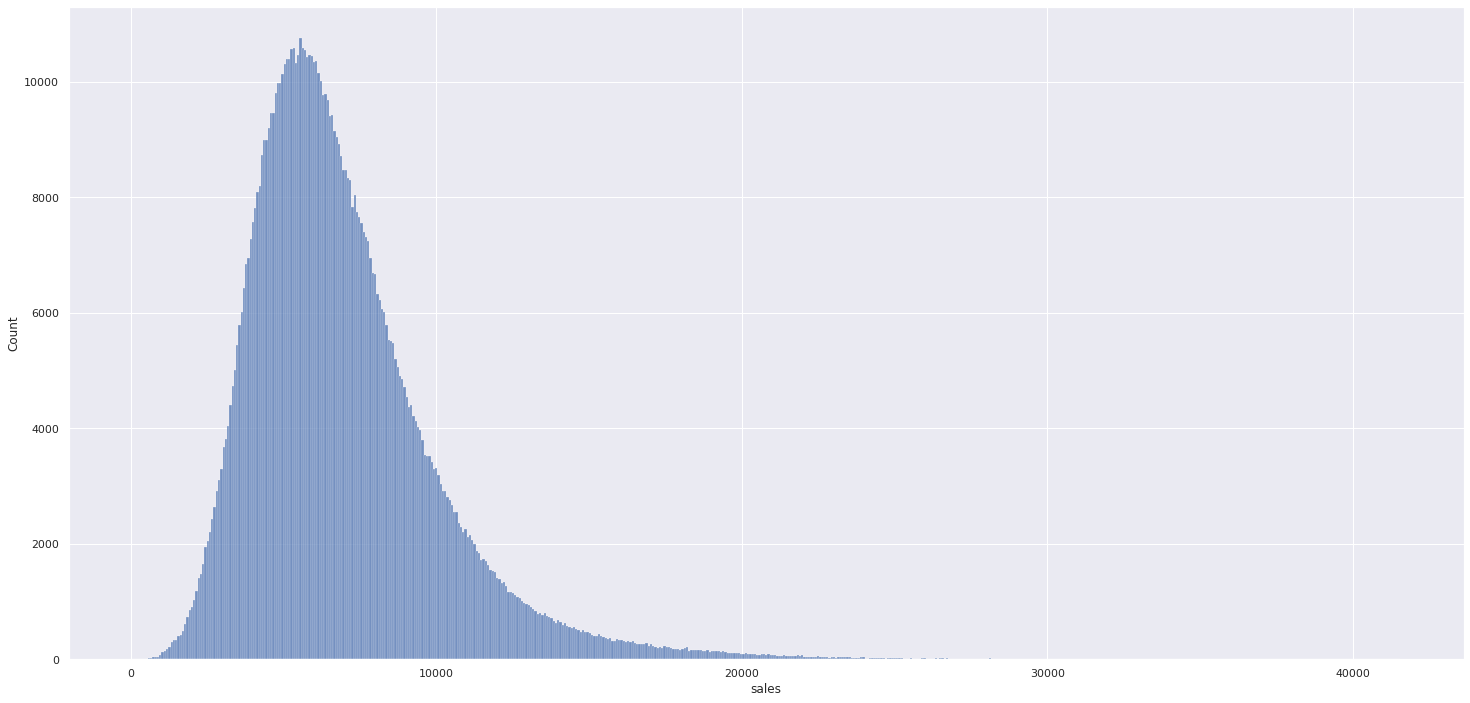

In [27]:
sns.histplot( df4['sales'] );

# Numeric Variable

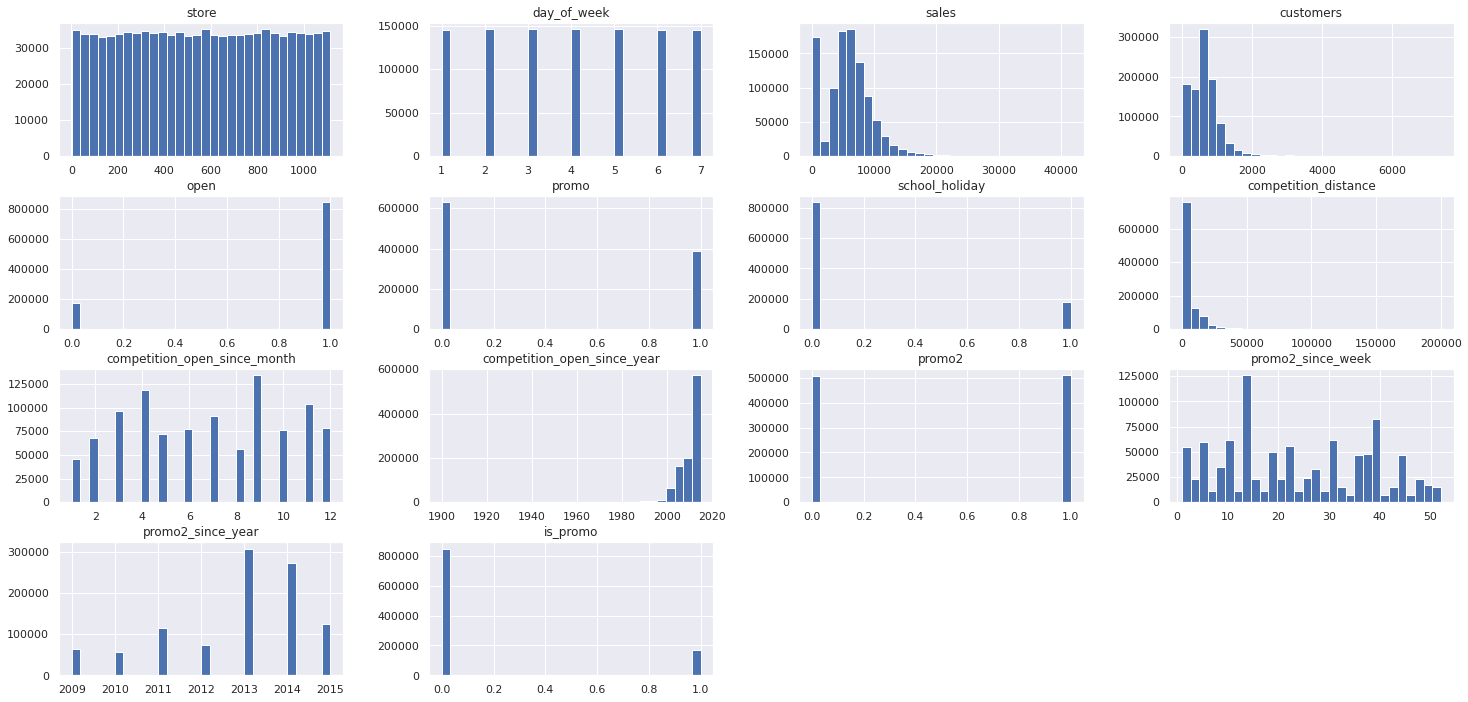

In [28]:
num_attributes.hist(bins=30);

* Plot Store: Não há diferença significativa de vendas entre lojas;
* Plot day of week : Não há nenhum dia especifico da semana que há um aumento nas vendas;
* Plot Sales: 
* Plot Customers: Neste demostra que quando há uma concetração maior de clientes nas lojas gerlamene há um aumento nas vendas;
* Plot open : Como esperados lojas abertas tem vendas maiores;
* Plot Promo : Neste plot há uma certa supresa. Há uma probabilidade maior de não ter vendas maiores quando há promoções;
* Plot School Holiday: Como já é esperado as vendas maiores são em dias regulares;
* Plot Competition Distance: Plot aponta que as vendas são maiores quando há competidores mais próximos. 
* Plot Competition Open Since Month: Neste plot é possível observar que os mês com maior pico de vendas é no mês 9;
* Plor Competition Open Since Year: No plot no período vendas anual é é possível observar que após ano de 2010 houve aumento nas vendas;
* Plot Promo2: Neste gráfico é possível analisar algo interessante. Que a continuação da promoção não afeta as chances de vender mais;
* Plot Promo Since Week: Neste plot semanal é observado que há um pico de vendas entre a semana 10 à 20. É necessário uma analisa mais aprofundada para saber o motivo de geralmente as promoções funcionarem melhor neste período. 
* Promo2 Since Year: Neste plot é possível concluir que o ano de 2013 e 2014 tiveram vendas bem significativas em relação aos demais anos;
* Is Promo: Neste gráfico é demostrado algo geralmente incomum na área de vendas. As promoções tem efeito menor nas vendas. 

# Categoric Variable

In [29]:
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


In [30]:
df4['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126         christmas
Name: state_holiday, dtype: object

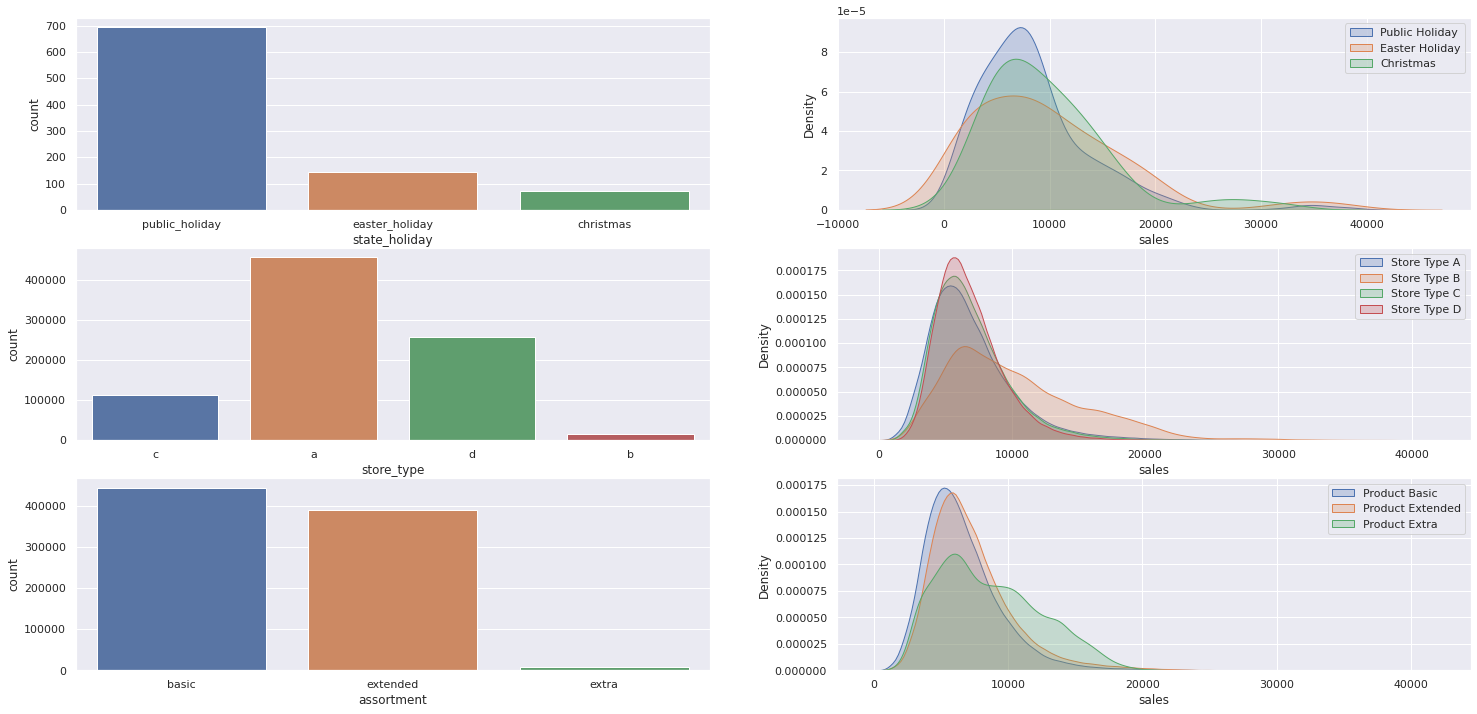

In [31]:
#comparando as vendas dos feriados
plt.subplot(3,2,1)

aux = df4[df4['state_holiday']!= 'regular_day']

sns.countplot(x='state_holiday', data = aux);

plt.subplot(3,2,2)
sns.kdeplot(df4.loc[df4['state_holiday']=='public_holiday']['sales'],label= 'Public Holiday',shade=True);
sns.kdeplot(df4.loc[df4['state_holiday']=='easter_holiday']['sales'],label= 'Easter Holiday',shade=True);
sns.kdeplot(df4.loc[df4['state_holiday']=='christmas']['sales'],label= 'Christmas',shade=True);
plt.legend(loc='best');

#store type
plt.subplot(3,2,3)
sns.countplot(x='store_type',data= df4);

plt.subplot(3,2,4)
sns.kdeplot(df4.loc[df4['store_type'] == 'a']['sales'], label='Store Type A',shade=True);
sns.kdeplot(df4.loc[df4['store_type'] == 'b']['sales'], label='Store Type B',shade=True);
sns.kdeplot(df4.loc[df4['store_type'] == 'c']['sales'], label='Store Type C',shade=True);
sns.kdeplot(df4.loc[df4['store_type'] == 'd']['sales'], label='Store Type D',shade=True);
plt.legend(loc='best');
#assortment

plt.subplot(3,2,5)
sns.countplot(x='assortment',data=df4);

plt.subplot(3,2,6)
sns.kdeplot(df4.loc[df4['assortment'] == 'basic']['sales'], label='Product Basic',shade=True);
sns.kdeplot(df4.loc[df4['assortment'] == 'extended']['sales'], label='Product Extended',shade=True);
sns.kdeplot(df4.loc[df4['assortment'] == 'extra']['sales'], label='Product Extra',shade=True);
plt.legend(loc='best');

# 4.2 Analise Bivariada

# H1 . Lojas com número maior de fúncionários deveriam vender mais.

# H2. Lojas com maior variedades de produtos deveriam vender mais.

### Falsa - Lojas com MAIS sortimentos vendem MENOS

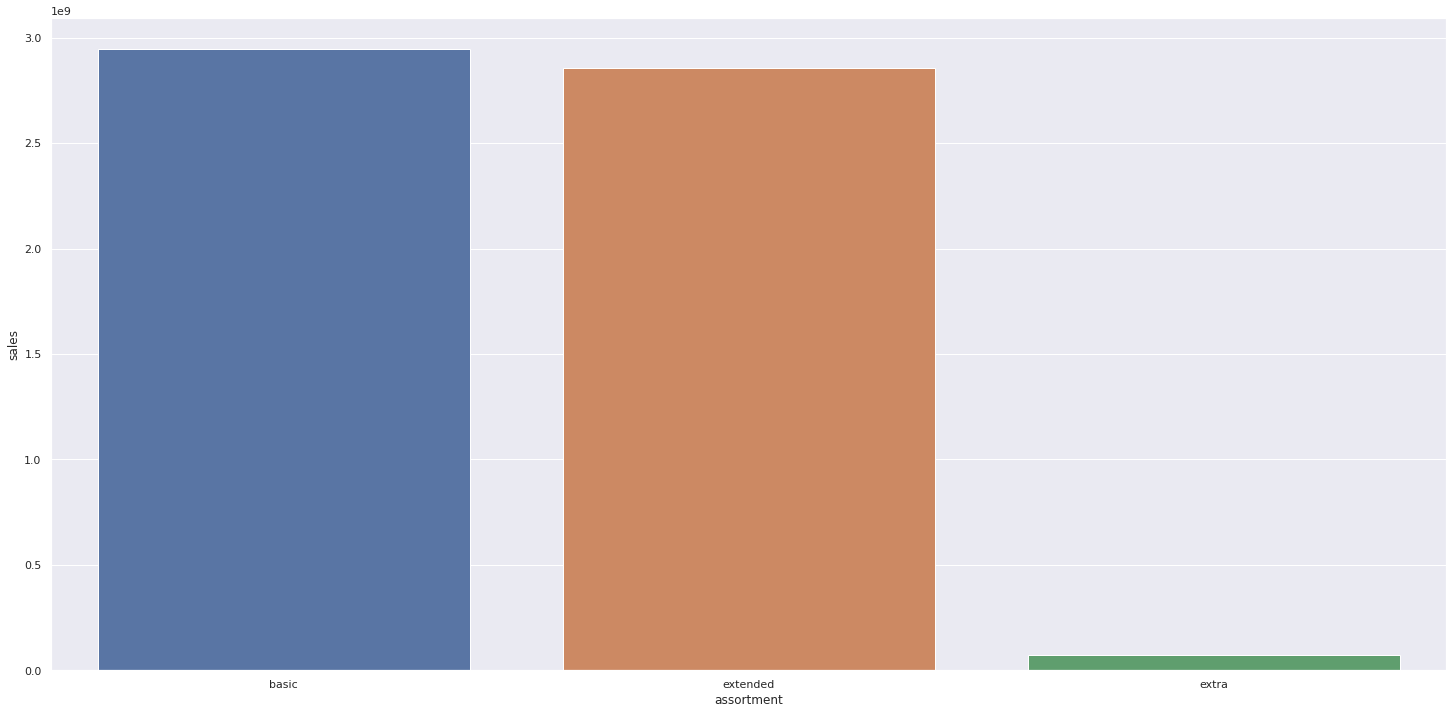

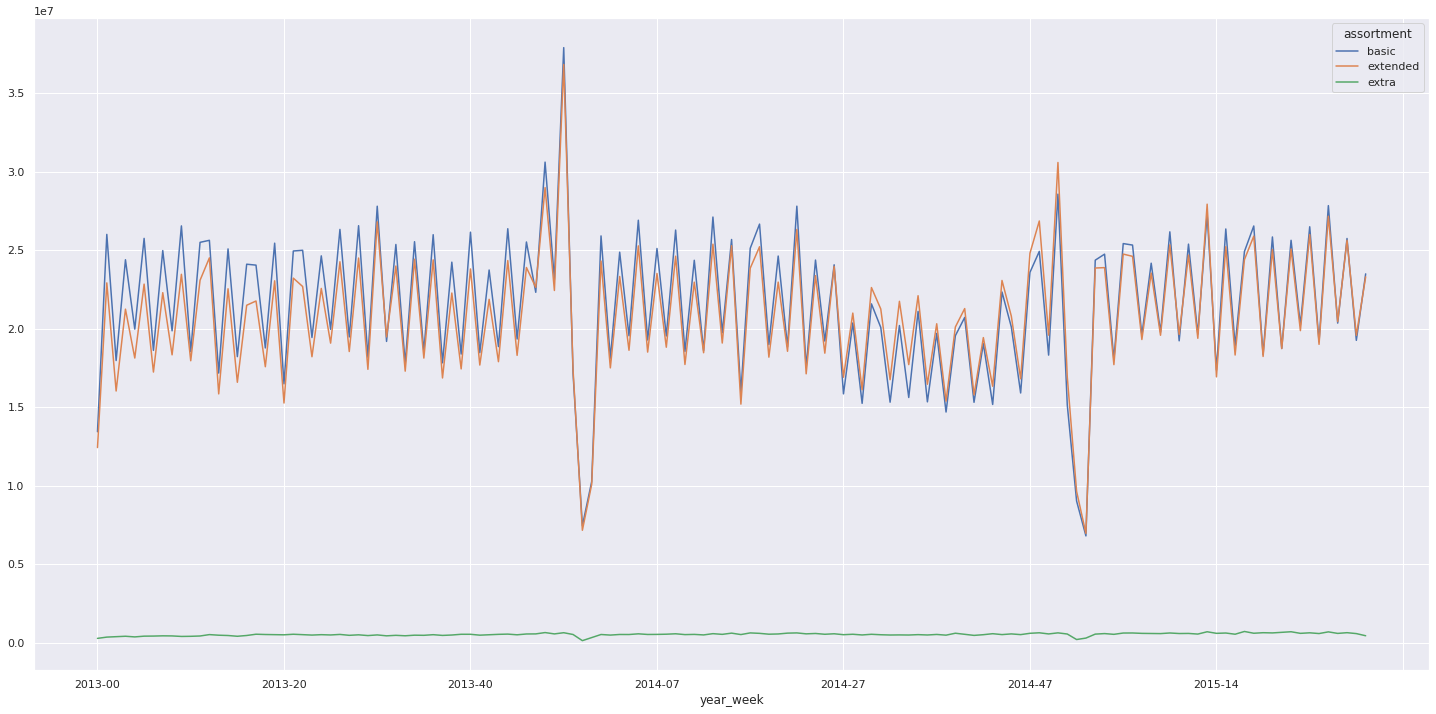

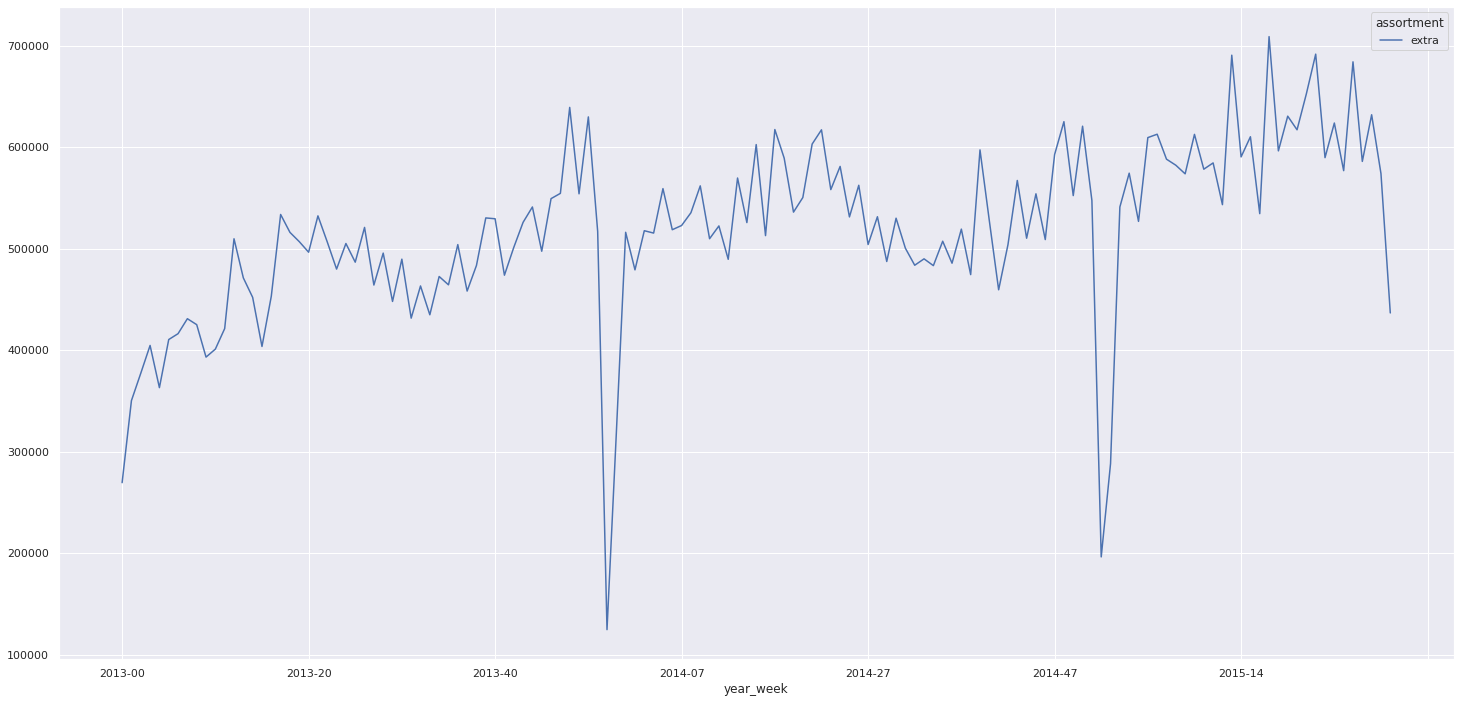

In [32]:
aux1 = df4[['assortment','sales']].groupby('assortment').sum().reset_index()

sns.barplot(x='assortment',y='sales', data = aux1);


aux2 = df4[['assortment','sales','year_week']].groupby(['assortment','year_week']).sum().reset_index()

aux2.pivot(index='year_week',columns='assortment',values='sales').plot();


aux3 = aux2.loc[aux2['assortment']=='extra']
aux3.pivot(index= 'year_week', columns='assortment', values='sales').plot();

# H3 - Lojas com competidores mais próximo deveriam venderiam menos.

### Falso: Lojas vendem mais com competidores mais próximo.

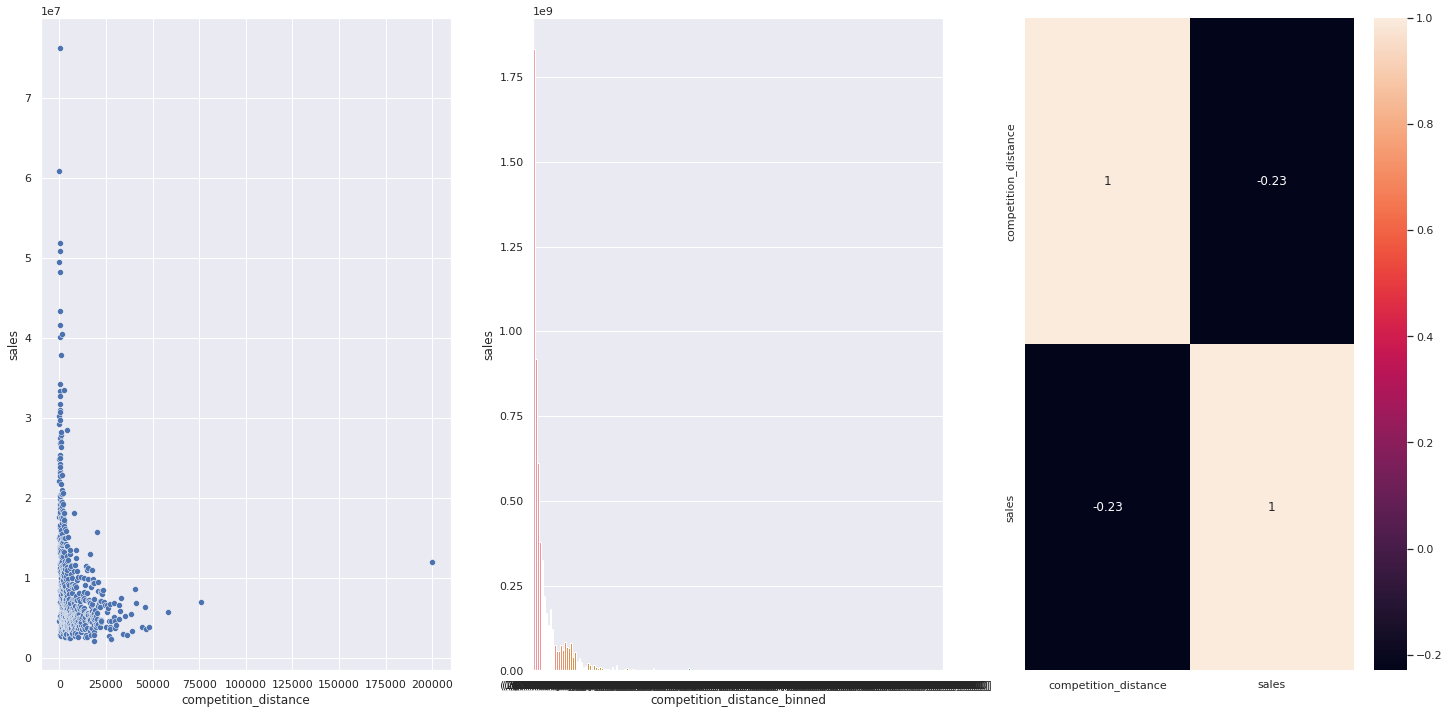

In [33]:
plt.subplot(1,3,1)

aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()

sns.scatterplot(x= 'competition_distance', y = 'sales', data = aux1)

plt.subplot(1,3,2)

#agrupando a disntancia em grupos
bins = list(np.arange(0,200000,1000))

#encaixando o grupos criados em uma nova coluna 
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins=bins)

aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()

sns.barplot(x = 'competition_distance_binned', y= 'sales', data = aux2);

plt.subplot(1,3,3)
#heatmap
sns.heatmap(aux1.corr(method='pearson'),annot=True);



# H4 - Lojas com competidores à mais tempo deveriam vender menos

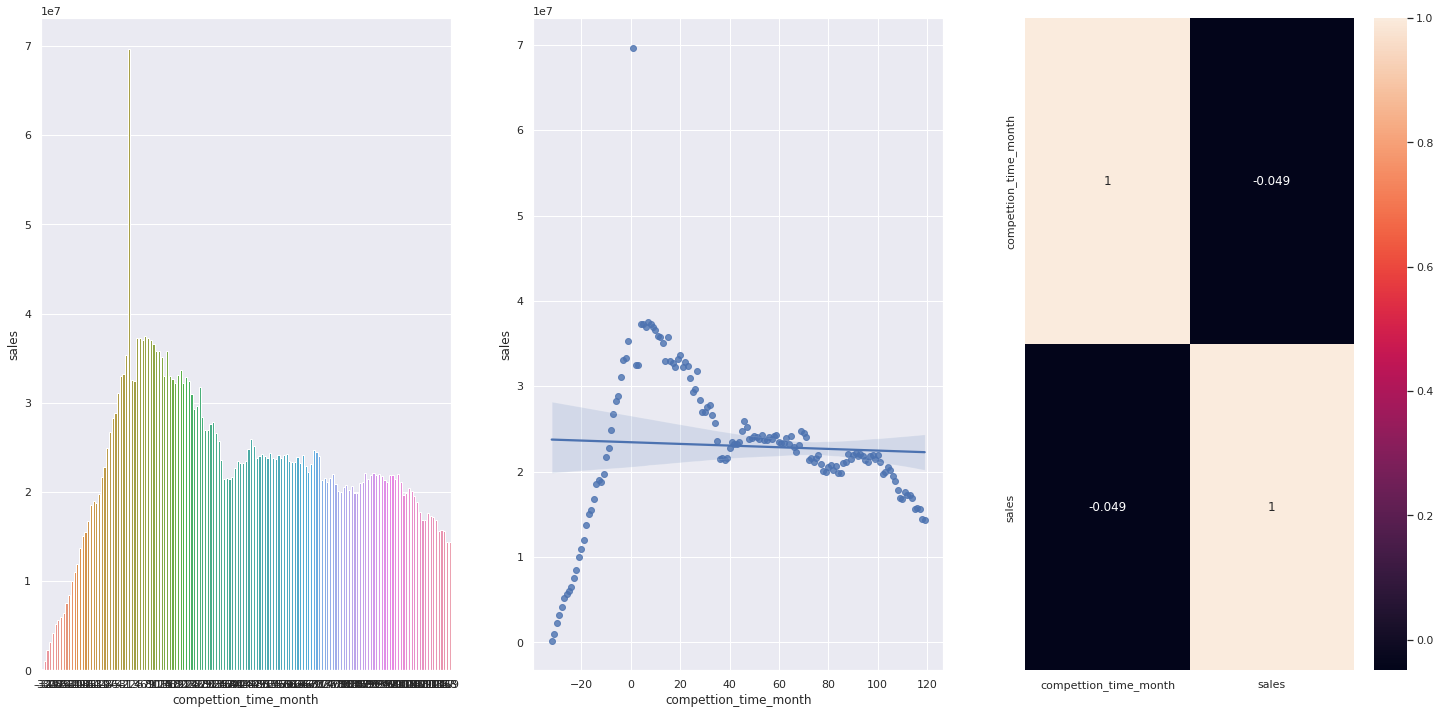

In [67]:
aux1 = df4[['compettion_time_month','sales']].groupby('compettion_time_month').sum().reset_index()

aux2 = aux1[(aux1['compettion_time_month'] < 120) & (aux1['compettion_time_month']!= 0)]

plt.subplot(1,3,1)
sns.barplot(x ='compettion_time_month', y = 'sales', data= aux2 );

plt.subplot(1,3,2)
sns.regplot(x = 'compettion_time_month', y = 'sales' , data= aux2);

plt.subplot(1,3,3)
sns.heatmap(aux2.corr(method='pearson'), annot= True);

# H5 - Lojas que ativam promoções por mais tempo deveriam vender mais.

### Falso: Lojas que tem promoões por mais tempo vendem menos

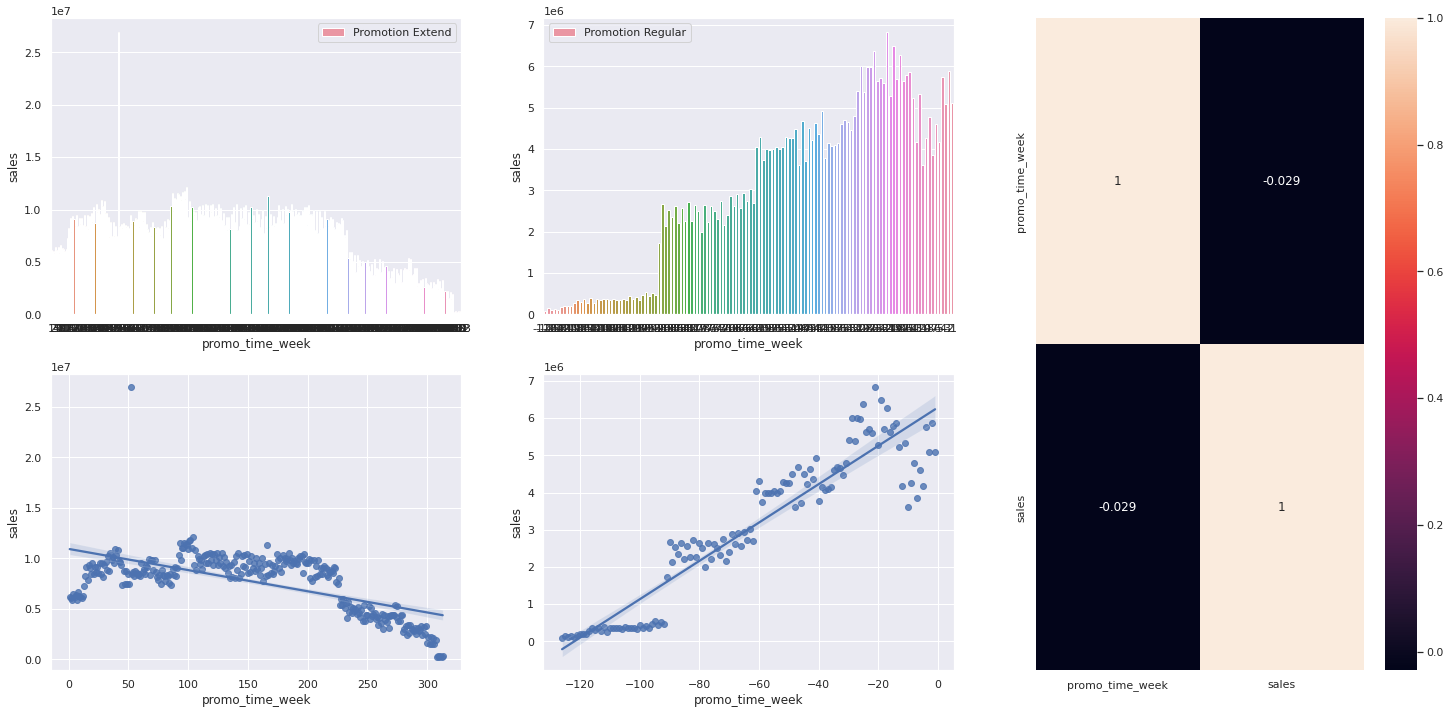

In [35]:
# ======= Promotion extend ========================= #

aux = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

grid = GridSpec(2 ,3)

aux1 = aux.loc[aux['promo_time_week']> 0]

plt.subplot( grid[0,0] )
sns.barplot(x= 'promo_time_week', y = 'sales', data=aux1, label= 'Promotion Extend');
plt.legend(loc='best');

plt.subplot( grid[1,0] )
sns.regplot(x = 'promo_time_week', y= 'sales', data=aux1);

plt.subplot(grid[0,1])


# ================== Promotion Regular =================

aux3 = aux.loc[aux['promo_time_week']< 0]

sns.barplot(x= 'promo_time_week', y = 'sales', data=aux3, label= 'Promotion Regular');
plt.legend(loc='best');

plt.subplot( grid[1,1] )
sns.regplot(x = 'promo_time_week', y= 'sales', data=aux3);

plt.subplot(grid[:,2])
sns.heatmap(aux.corr(method='pearson'), annot=True);

# H6- Lojas com mais promoções consecutivas deveriam vender mais.

### Falso - Lojas com mais promoções sucessivas não vendem mais.

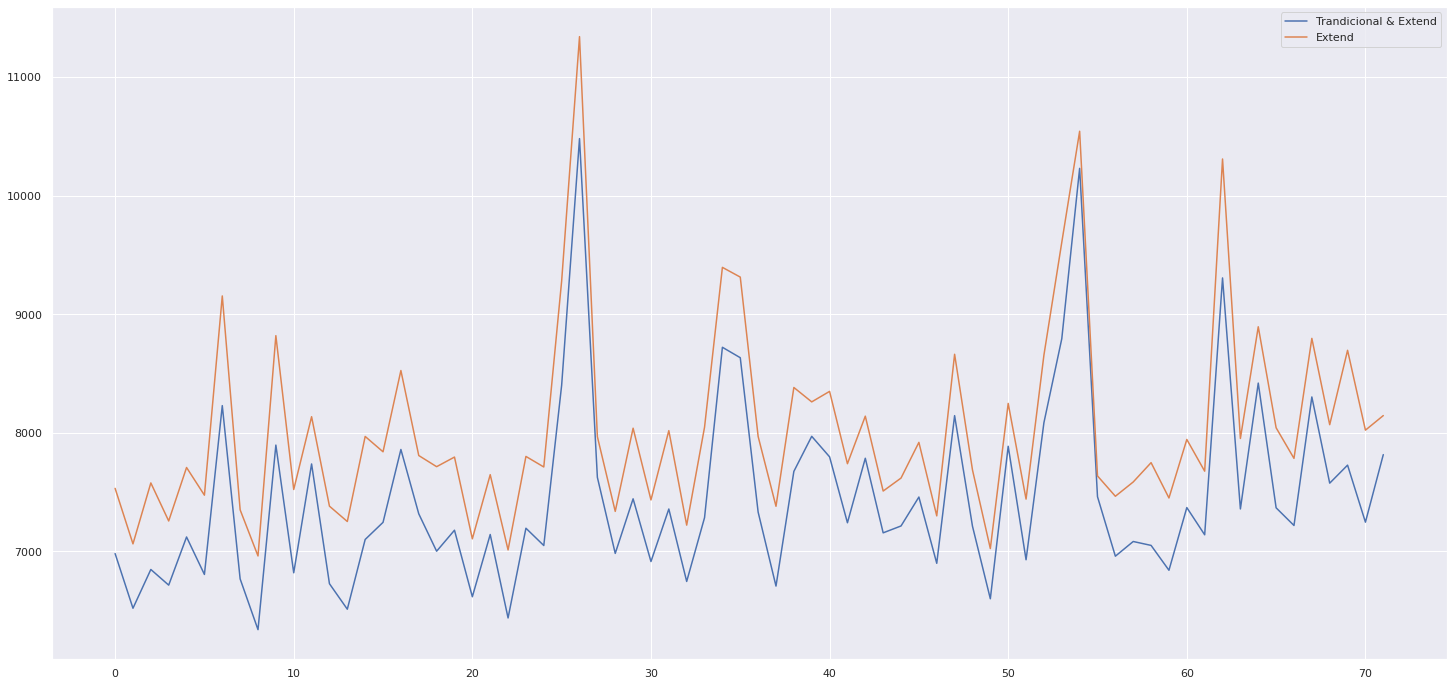

In [36]:
#select the store with regular promo and promo extend. 
aux1 = df4.loc[ (df4['promo']==1) & (df4['promo2']==1)][['sales','year_week']].groupby('year_week').median().reset_index()
plot1 = aux1.plot();
plot1

aux2 = df4.loc[ (df4['promo']==1) & (df4['promo2']==0)][['sales','year_week']].groupby('year_week').median().reset_index()
plot2 = aux2.plot(ax = plot1);

plot2;

plot1.legend(labels= ['Trandicional & Extend', 'Extend'] );

# H6 - Lojas abertas durante o feriado de Natal deveriam vender mais.

### Falso: Lojas abertas durante o feriado de Natal vendem menos.

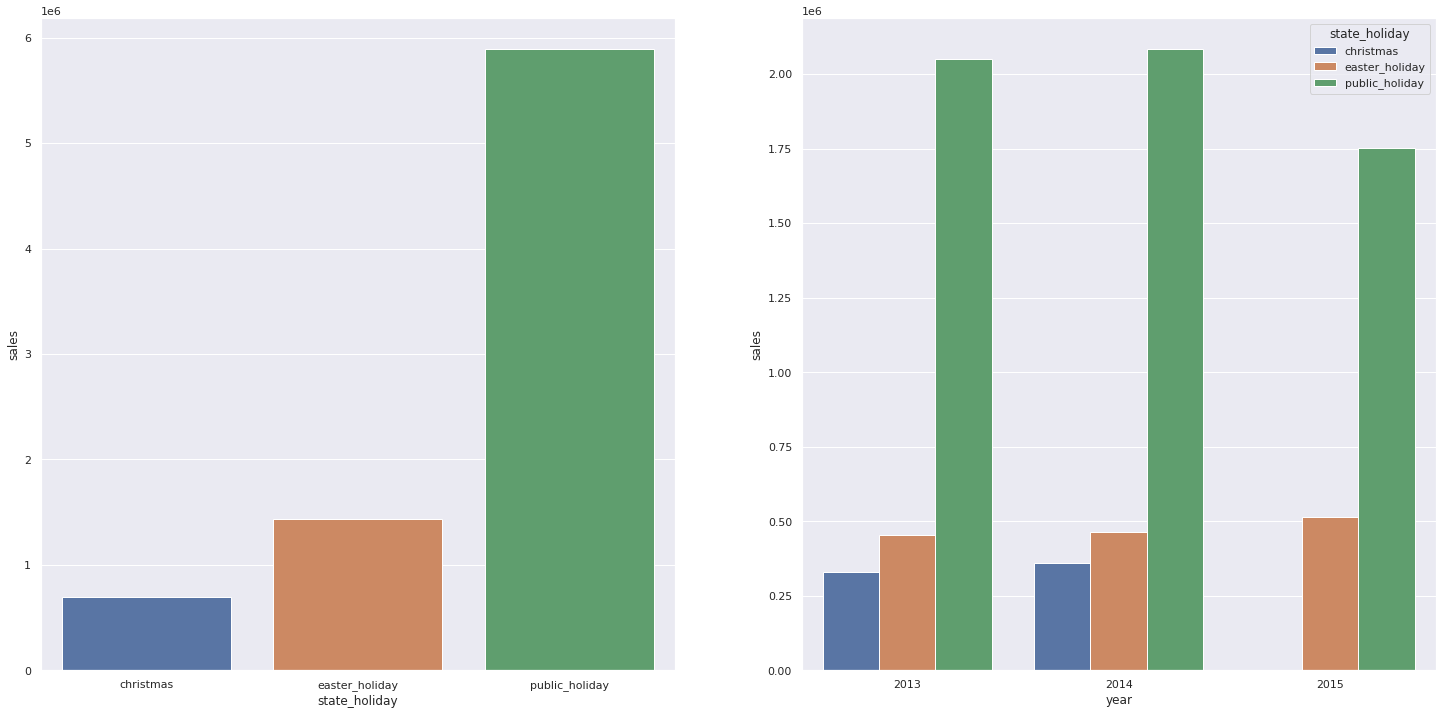

In [37]:
# ========= Comparative between the Holidays ====================#


aux = df4.loc[df4['state_holiday'] !='regular_day']

aux1 = aux[['state_holiday','sales']].groupby('state_holiday').sum().reset_index()

plt.subplot(1,2,1)
sns.barplot(x ='state_holiday', y= 'sales', data = aux1);


# ========= Comparative holiday by year ==================#

aux2 = aux[['state_holiday','sales','year']].groupby(['state_holiday','year']).sum().reset_index()

plt.subplot(1,2,2)
sns.barplot(x ='year', y = 'sales', hue ='state_holiday', data= aux2);

# H7 - Lojas deveriam vender mais ao longo dos anos.

### Falso: Lojas vendem menos ao longo dos anos.

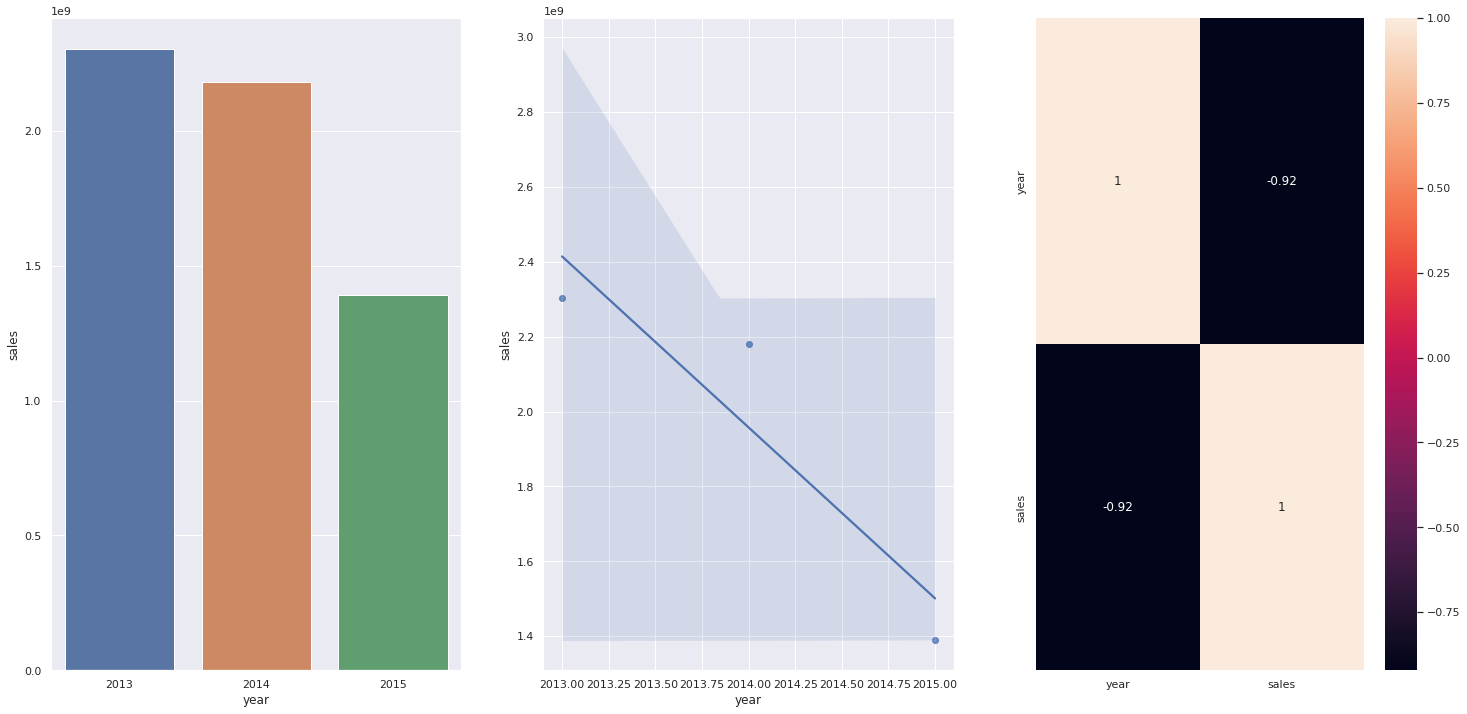

In [38]:
aux1 = df4[['year','sales']].groupby('year').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x = 'year', y= 'sales', data= aux1);

plt.subplot(1,3,2)
sns.regplot(x = 'year', y = 'sales', data= aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method ='pearson'), annot=True);

# H8 - Lojas deveriam vender mais no segundo semestre do ano.

### Falso : Lojas NÃO vendem mais no SEGUNDO semestre do ano.

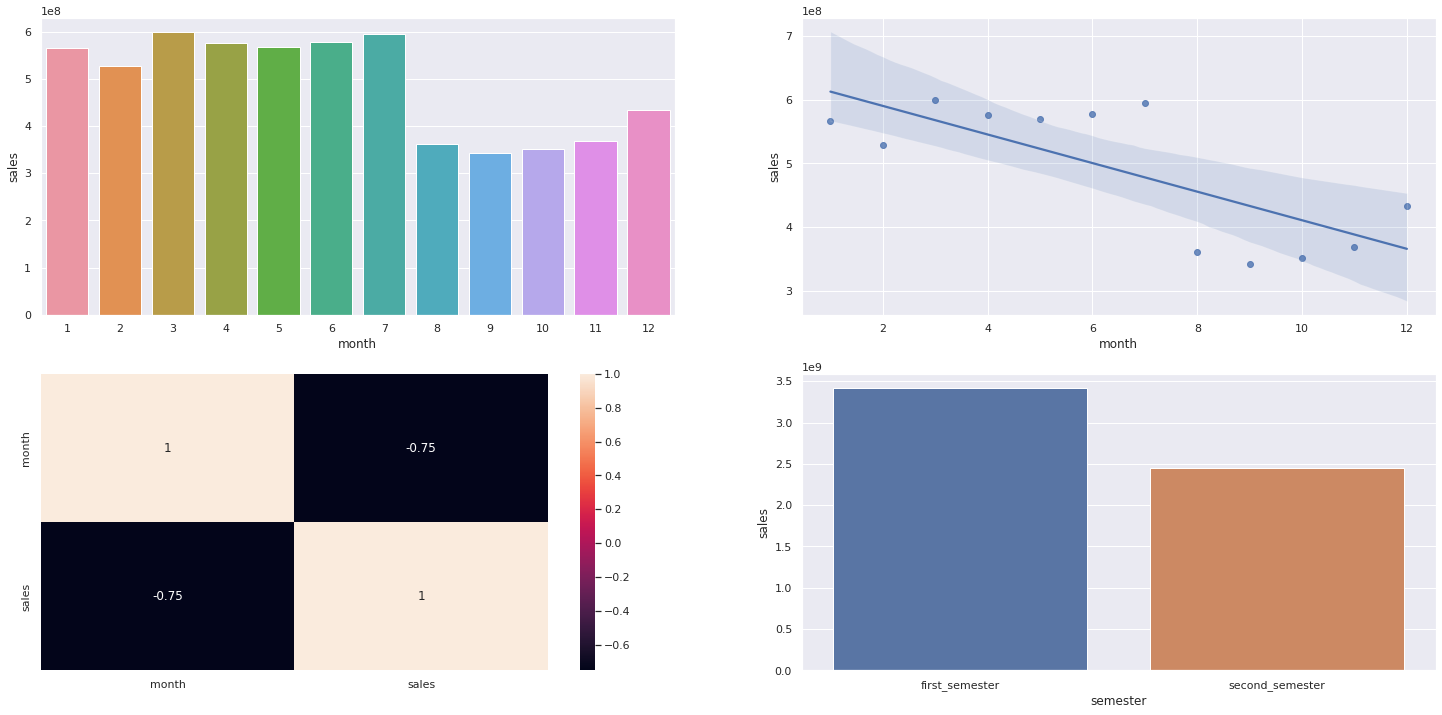

In [39]:
#grouping and ordering the month and sales
aux = df4[['sales', 'month']].groupby('month').sum().reset_index()

#plot the all month
plt.subplot(2,2,1)
sns.barplot(x= 'month', y = 'sales', data = aux);

plt.subplot(2,2,2)
sns.regplot(x= 'month', y = 'sales', data = aux);

plt.subplot(2,2,3)
sns.heatmap(aux.corr(method='pearson'), annot = True);

# ========= split the year in semester  ============= #

aux['semester'] = aux['month'].apply(lambda x: 'first_semester' if x <=6 else 'second_semester')

aux1 = aux[['semester','sales']].groupby('semester').sum().reset_index()

plt.subplot(2,2,4)
sns.barplot(x = 'semester', y = 'sales', data= aux1);


# H8 - Lojas deveriam vender mais depois do dia 10 de cada mês.

# Verdade : Lojas vendem MAIS após o dia 10 de cada mês.

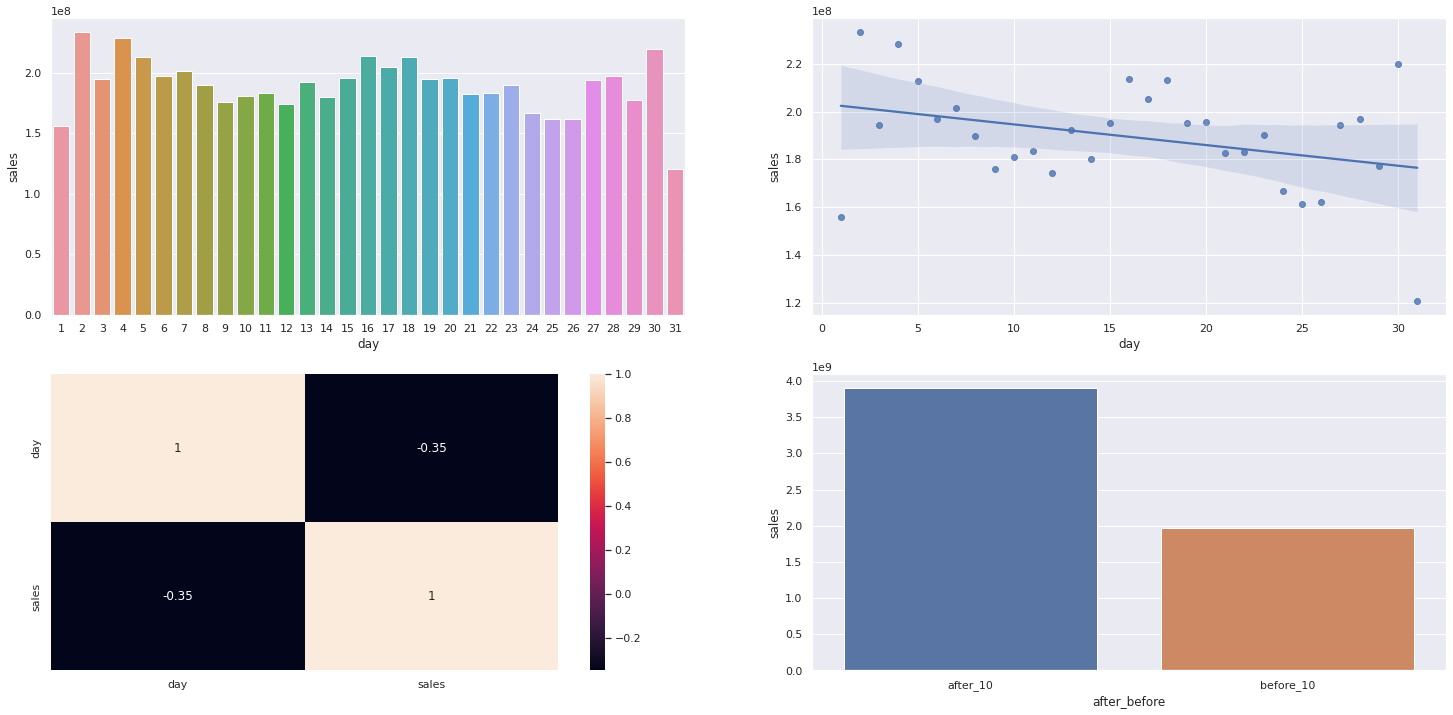

In [40]:
aux = df4[['day','sales']].groupby('day').sum().reset_index()

plt.subplot(2,2,1)
sns.barplot(x = 'day', y = 'sales', data = aux);

plt.subplot(2,2,2)
sns.regplot(x = 'day', y = 'sales', data = aux);

plt.subplot(2,2,3)
sns.heatmap(aux.corr(method = 'pearson'), annot = True);

#================== filtering the data ===============================#

aux['after_before'] = aux['day'].apply(lambda x: 'after_10' if x > 10 else 'before_10')

after_before = aux[['after_before','sales']].groupby('after_before').sum().reset_index()

plt.subplot(2,2,4)
sns.barplot(x = 'after_before', y = 'sales', data= after_before);

# H9 Lojas deveriam vender menos aos finais de semana.

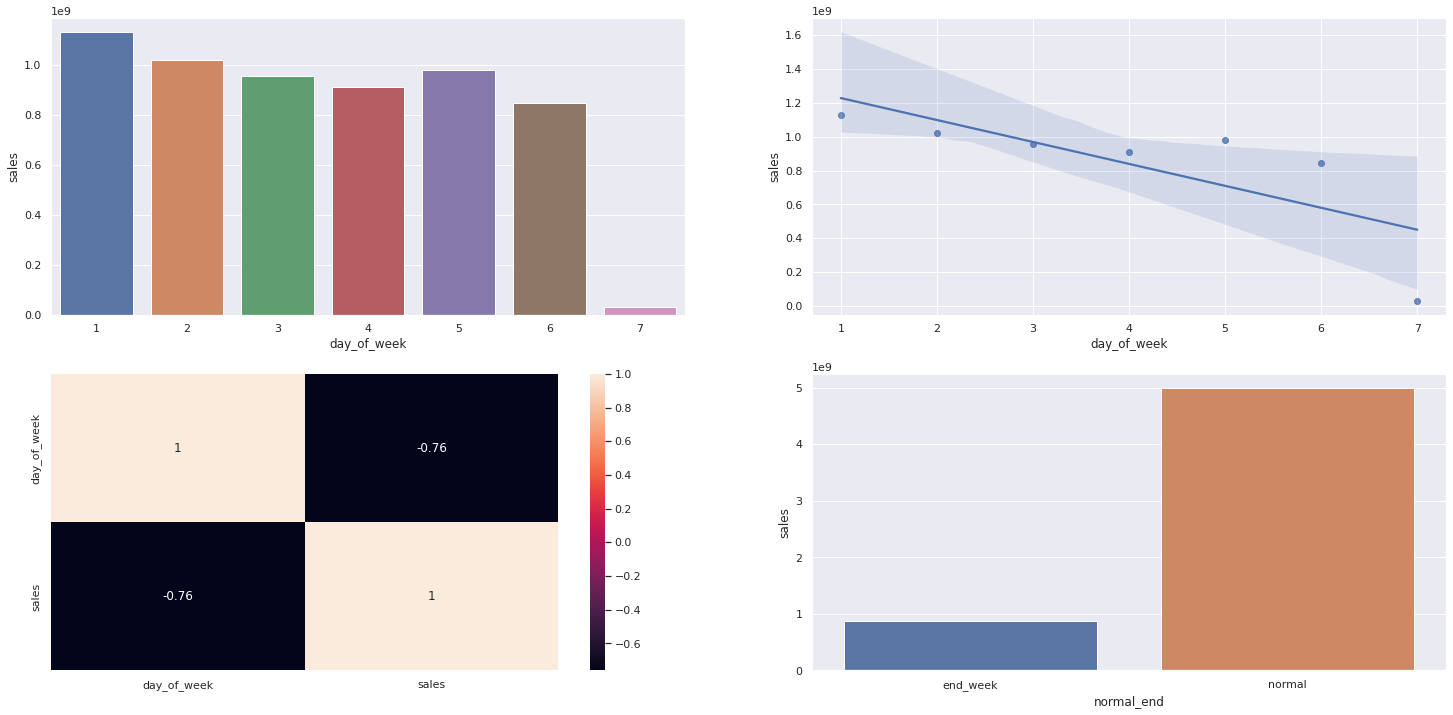

In [41]:
aux = df4[['day_of_week','sales']].groupby('day_of_week').sum().reset_index()

plt.subplot(2,2,1)
sns.barplot(x = 'day_of_week', y = 'sales', data = aux);

plt.subplot(2,2,2)
sns.regplot(x = 'day_of_week', y = 'sales', data = aux);

plt.subplot(2,2,3)
sns.heatmap(aux.corr(method = 'pearson'), annot = True);

#====================== iltering the days of week ===================
aux['normal_end'] = aux['day_of_week'].apply(lambda x: 'end_week' if x >=6 else 'normal')

days = aux[['normal_end','sales']].groupby('normal_end').sum().reset_index()
plt.subplot(2,2,4)
sns.barplot(x = 'normal_end', y = 'sales', data = days);

# H10 - Lojas deveriam vender menos durante os feriados escolares.

### Verdade: Lojas vendem menos durante os feriados escolares, exceto Julho e Agosto.

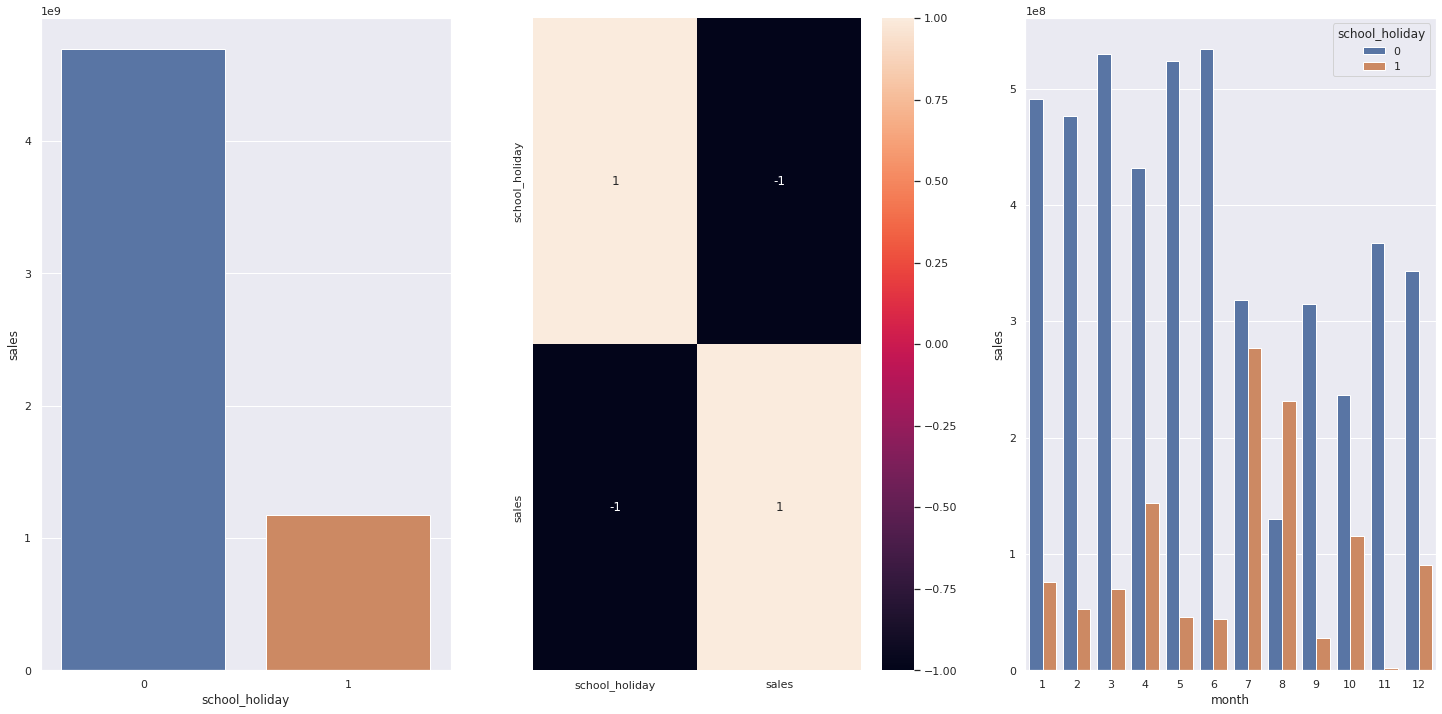

In [66]:
aux = df4[['school_holiday','sales']].groupby('school_holiday').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x = 'school_holiday', y = 'sales', data= aux);

plt.subplot(1,3,2)
sns.heatmap(aux.corr(method = 'pearson'), annot = True);

# ======== Comparative by month =========================================# 

aux1 = df4[['school_holiday','month','sales']].groupby( ['month','school_holiday'] ).sum().reset_index()

plt.subplot(1,3,3)
sns.barplot(x = 'month', y = 'sales', hue='school_holiday', data= aux1);